# Gradient descent HW1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Closest point projection function and visualization for the simple domains

In [8]:
# Closest point projection for PGD
def closes_point_projection(x,y, domain):
    if domain == "circle":
        # If outisde the circle
        if x**2 + y**2 > 1.5:
            scaling =np.sqrt(1.5)/ np.sqrt(x**2 + y**2)
            return x * scaling, y * scaling
        # if inside leave
        #print("here")
        return x,y
    if domain == "square":
        # vertices 
        if np.abs(y) > 1 and np.abs(x) > 1:
            return x/np.abs(x), y/np.abs(y)
        # edges
        if np.abs(y) > 1 and np.abs(x) < 1:
            return x,y/np.abs(y)
        if np.abs(x) > 1 and np.abs(y) < 1:
            return x/np.abs(x),y
        #print("here")
        return x,y
    if domain == "triangle":
        if x < -1 and y > -1 and y < 1.5:
            return -1,y
        if x < -1 and y < -1:
            return -1,-1
        if x > -1 and x < 1.5 and y < -1:
            return x,-1
        if x > 1.5 and y < x - 2.5:
            return 1.5, -1
        if y > -x + 0.5 and y > x - 2.5 and y < x + 2.5:
            t = (0.5 - x + y)/(np.sqrt(2 * (x-0.5)**2 + y**2))
            return 0.5 + -t, t
        if y > 1.5 and y > 2.5 + x:
            return -1,1.5
        #print("here")
        return x,y 


 

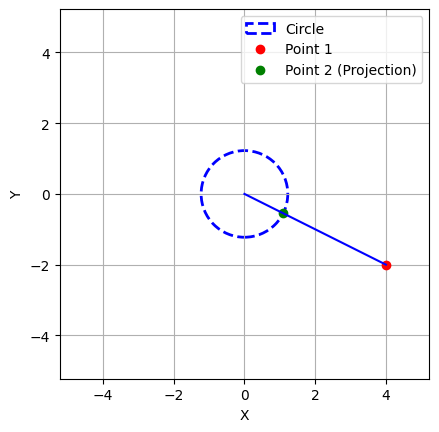

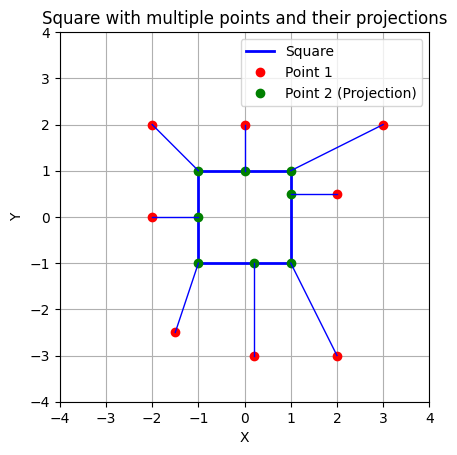

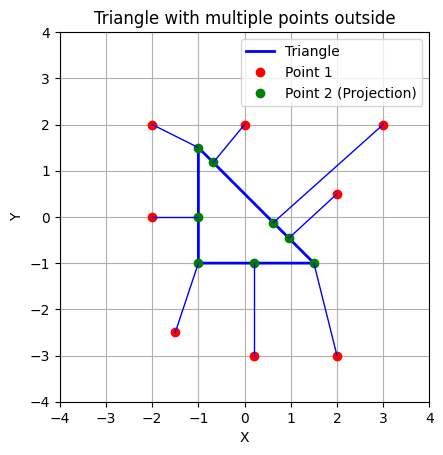

In [9]:
# Visualization for circle 
point1 = 4,-2
point2 = closes_point_projection(point1[0], point1[1], "circle") 
radius = np.sqrt(1.5) 
# Create a figure and axis
fig, ax = plt.subplots()

# Create the circle
circle = plt.Circle((0, 0), radius, color='blue', fill=False, linestyle='--', linewidth=2)
ax.add_artist(circle)

# Plot the points
ax.plot(point1[0], point1[1], 'ro', label="Point 1")
ax.plot(point2[0], point2[1], 'go', label="Point 2")

# Add a line from (0, 0) to point 2
ax.plot([0, point1[0]], [0, point1[1]], 'b-', label="Line from (0,0) to Point 2")

# Set axis limits
ax.set_xlim(-radius-4, radius+4)
ax.set_ylim(-radius-4, radius+4)

# Set equal scaling
ax.set_aspect('equal', 'box')
# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
# Show the legend
ax.legend(['Circle', 'Point 1', 'Point 2 (Projection)'])

plt.grid(True)

################# Square
points1 = [(3,2), (2,0.5), (2,-3), (0.2,-3), (-1.5,-2.5), (-2,0), (-2,2), (0,2)]

# Create a figure and axis
fig, ax = plt.subplots()

# Create the square (bounds [-1, 1] x [-1, 1])
square_x = [-1, 1, 1, -1, -1]
square_y = [-1, -1, 1, 1, -1]
ax.plot(square_x, square_y, 'b-', label="Square [-1, 1] x [-1, 1]", linewidth=2)

# Plot the points and their projections
for point1 in points1:
    point2 = closes_point_projection(point1[0], point1[1], "square")
    ax.plot(point1[0], point1[1], 'ro')  # Point 1
    ax.plot(point2[0], point2[1], 'go')  # Point 2 (projection)

    ax.plot([point1[0], point2[0]], [point1[1], point2[1]], 'b-', linewidth=1)

# Set axis limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Set equal scaling
ax.set_aspect('equal', 'box')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Square with multiple points and their projections')

# Show the legend
ax.legend(['Square', 'Point 1', 'Point 2 (Projection)'])

# Show the plot
plt.grid(True)


###### Triangle
# Define the triangle vertices
triangle_vertices = [(-1, -1), (1.5, -1), (-1, 1.5)]

# Generate points outside the triangle
points1 = [(3, 2), (2, 0.5), (2, -3), (0.2, -3), (-1.5, -2.5), (-2, 0), (-2, 2), (0, 2)]

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the triangle
triangle_x = [-1, 1.5, -1, -1]
triangle_y = [-1, -1, 1.5, -1]
ax.plot(triangle_x, triangle_y, 'b-', label="Triangle", linewidth=2)

# Plot the points outside the triangle
for point1 in points1:
    ax.plot(point1[0], point1[1], 'ro')  # Point 1 (outside the triangle)
    point2 = closes_point_projection(point1[0], point1[1], "triangle")
    ax.plot(point2[0], point2[1], 'go')

    # Draw a line from the origin to point1 (for visualization)
    ax.plot([point2[0], point1[0]], [point2[1], point1[1]], 'b-', linewidth=1)

# Set axis limits
ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)

# Set equal scaling
ax.set_aspect('equal', 'box')

# Labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Triangle with multiple points outside')

# Show the legend
ax.legend(['Triangle', 'Point 1', 'Point 2 (Projection)'])

# Show the plot
plt.grid(True)
plt.show()


In [10]:
def fun(x,y):
    return x**2 + np.exp(x) + y**2 - x*y

def grad_f(x,y):
    return (2*x + np.exp(x) - y, 2 * y - x)

In [11]:
# Find the approximate x_star
minimum = 5
x_star = (0,0)
for x in np.arange(-2,2, step=0.001):
    for y in np.arange(-2,2, step=0.001):
        curr_val = fun(x,y)
        if curr_val < minimum:
            x_star = x,y
            minimum = curr_val


In [103]:
alpha

np.float64(1.065380801575904)

In [107]:
# Implement PGD
x_1 = np.array([-1,1]).astype(np.int32)
# Theoretically found parameters
L = np.sqrt(72 + 12*np.exp(2) + np.exp(4) )
alpha = (4 + np.exp(-2) - np.sqrt(np.exp(-4) + 4))/2
beta = (4+np.exp(2) + np.sqrt(np.exp(4) + 4))/2
# Set the number of steps 
T = 10
# Iitialize gammas
gammas = [np.linalg.norm(x_1-x_star)/(L*np.sqrt(T)),
           1/beta, 2/alpha] # The last on has to be adjusted with each step
# array of all x-s
x_k_all = np.zeros(shape=(3,3,T+1)).tolist()

#kappa for the guarantees
kappa = beta/alpha

print(x_star)
for j,domain in enumerate(("circle", "square", "triangle")):
    for i, gamma in enumerate(gammas):
        x_k = x_1
        for k in range(T):

            if i == 2:
                gamma = gamma/(k+2)
                            # closest point projection
            x_k =  np.array(closes_point_projection(x_k[0], x_k[1], domain=domain))

            x_k_all[j][i][k] = x_k

            grd = grad_f(x_k[0], x_k[1])
            x_k = x_k - (gamma * grd[0], gamma*grd[1])

            if i == 2:
                gamma *= k+2

        x_k_all[j][i][T] =   x_k
        #print(x_k)
            

(np.float64(-0.4320000000001727), np.float64(-0.21600000000019648))


In [125]:
# Theoretical guarantees, only take the circle here (only the first one, and third one)
x_k_all_circle = x_k_all[0]
# First one 
x_k_curr = x_k_all_circle[0]
x_mean,y_mean = np.mean(x_k_curr, axis=0)

left_side = fun(x_mean, y_mean)- fun(x_star[0], x_star[1])
right_side = L * np.linalg.norm(x_1 - x_star) / np.sqrt(T)
print(f"{left_side} <= {right_side}") ### it holds
# Second one 
x_k_curr = x_k_all_circle[1]
x_in = x_k_curr[len(x_k_curr)-1]
left_side = fun(x_in[0], x_in[1]) - fun(x_star[0], x_star[1])
right_side = beta/2 * ((kappa-1)/kappa)**(2*T) * np.linalg.norm(x_1 - x_star)**2
print(f"{left_side} <= {right_side}")
# Third one
x_k_curr = x_k_all_circle[2]
input_1x, input_1y = (np.sum([2*(i) * x[0] for i,x in zip(range(1,T+2), x_k_curr)]) / ((T+2)*(T+1)),
                      np.sum([2*(i) * x[1] for i,x in zip(range(1,T+2), x_k_curr)]) / ((T+2)*(T+1)))

left_side = fun(input_1x, input_1y) - fun(x_star[0], x_star[1])
right_side = 2 * L**2/(alpha * (T+1))
print(f"{left_side} <= {right_side}")

0.8265127573435608 <= 6.227004282400521
0.013882571568824331 <= 0.7991922730964053
6.259010736031634e-05 <= 36.7374955000112


## Exercise 2

In [3]:
# Coefficients from the table
a_ij = np.array([
    [3.0, 10, 30],
    [0.1, 10, 35],
    [3.0, 10, 30],
    [0.1, 10, 35]
])

c_j = np.array([1.0, 1.2, 3.0, 3.2])

p_ij = np.array([
    [0.36890, 0.1170, 0.2673],
    [0.46990, 0.4387, 0.7470],
    [0.10910, 0.8732, 0.5547],
    [0.03815, 0.5743, 0.8828]
])

def function(z):
    total = 0
    for i in range(4):  # Sum over i
        exponent = -np.sum(a_ij[i] * (z - p_ij[i])**2)  # Sum over j
        total += c_j[i] * np.exp(exponent)
    return -total

def gradient(z):
    grad = np.zeros(3)
    for i in range(4):
        exponent = np.exp(-np.sum(a_ij[i] * (z- p_ij[i])**2))
        for j in range(3):
            grad[j] += 2*c_j[i] * a_ij[i,j] * (z[j] - p_ij[i,j]) * exponent

    return grad


In [4]:
# Find the approximate x_star
minimum = 5
x_star = (0,0,0)

for z1 in np.arange(0,1,0.1):
    for z2 in np.arange(0,1,0.1):
        for z3 in np.arange(0,1,0.1):
            curr_val = function((z1,z2,z3))
            if curr_val < minimum:
                x_star = z1,z2,z3
                minimum = curr_val


In [126]:
# Find the approximate x_star
minimum = 5
x_star = (0,0,0)

for z1 in np.arange(0,1,0.1):
    for z2 in np.arange(0,1,0.1):
        for z3 in np.arange(0,1,0.1):
            curr_val = function((z1,z2,z3))
            if curr_val < minimum:
                x_star = z1,z2,z3
                minimum = curr_val


# Use gradient descent for more precise
gamma = 0.01
T = 5000
x_k = np.array(x_star, dtype=np.float64)
for k in range(T):
    #gamma = gamma/(k+1)
    grd = gradient(x_k)
    print(x_k)
    print(function(x_k))
    if function(x_k) - function((x_k - [gamma * grd[0], gamma*grd[1], gamma*grd[2]])) < 1e-25:
        print(k)
        break
    x_k = x_k - [gamma * grd[0], gamma*grd[1], gamma*grd[2]]
    #gamma = gamma * (k+1) 


[0.1 0.6 0.9]
-3.586922560937449
[0.09993021 0.57303267 0.81082386]
-3.695455409046886
[0.10032849 0.56090403 0.88081134]
-3.783914671434262
[0.10035866 0.55904959 0.82511929]
-3.7923334955438133
[0.10068212 0.55563426 0.87435185]
-3.815962697973548
[0.10074243 0.55705771 0.83119426]
-3.8197568968369953
[0.10102753 0.55511407 0.87034282]
-3.8315880638631645
[0.10110334 0.55663719 0.83517956]
-3.834075120392574
[0.10136123 0.55511558 0.86743398]
-3.840972536447302
[0.10144725 0.55644459 0.83809206]
-3.8427545902263023
[0.10168437 0.55517118 0.86517766]
-3.847093819469869
[0.10177765 0.55631241 0.84034508]
-3.848422817729965
[0.10199806 0.55522832 0.8633606 ]
-3.851285851984801
[0.10209662 0.55621068 0.84215066]
-3.8522977347332787
[0.1023031  0.55528051 0.86186169]
-3.854249416148028
[0.1024055  0.55612914 0.84363209]
-3.855028510622372
[0.10260005 0.55532707 0.86060486]
-3.8563906484885604
[0.10270521 0.55606231 0.84486756]
-3.8569941158699654
[0.10288937 0.55536831 0.85953887]
-3.8579